In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


import warnings
warnings.filterwarnings("ignore")

In [4]:
DF=pd.read_csv('dataset.csv')
DF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data first look

In [5]:
nRow, nCol = DF.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1025 rows and 14 columns


In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
DF.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
DF.describe().round(2).style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.430000,0.700000,0.940000,131.610000,246.000000,0.150000,0.530000,149.110000,0.340000,1.070000,1.390000,0.750000,2.320000,0.510000
std,9.070000,0.460000,1.030000,17.520000,51.590000,0.360000,0.530000,23.010000,0.470000,1.180000,0.620000,1.030000,0.620000,0.500000
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

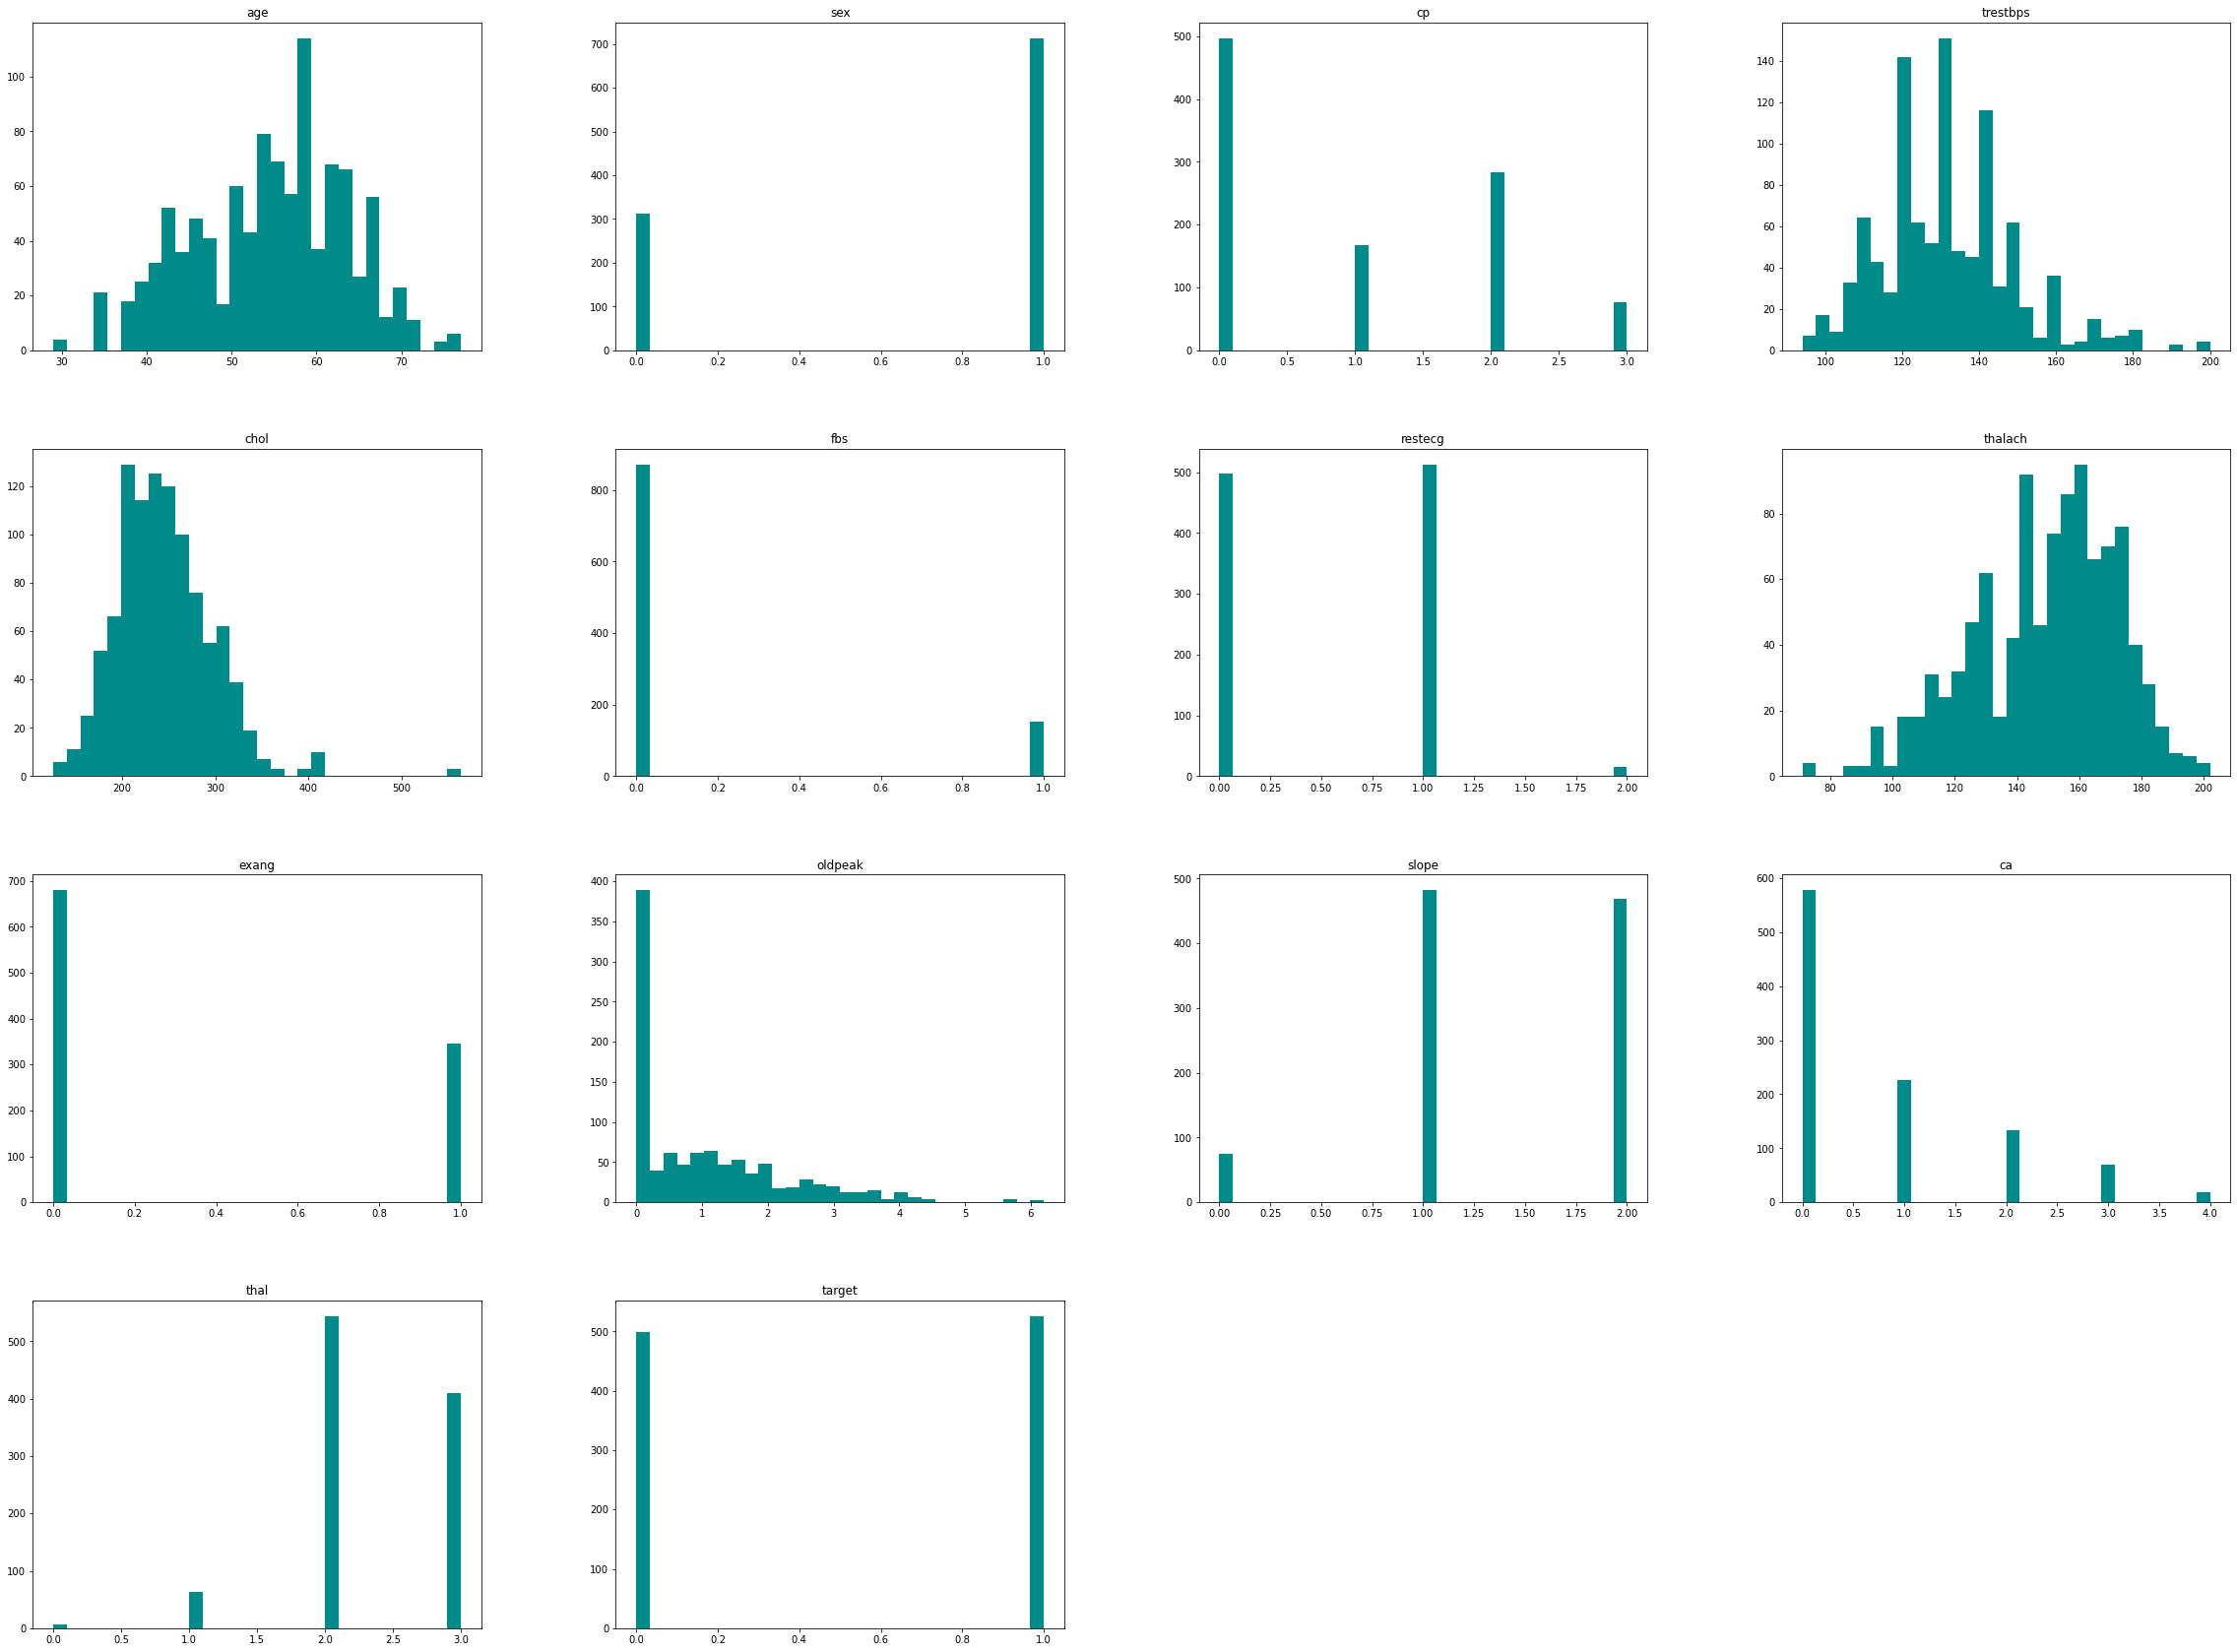

In [9]:
DF.hist(bins = 30 , layout = (4,4), figsize = (40,30)  ,column = DF.columns[0:], color= "DarkCyan", grid = False)
plt.show()

In [10]:
DF_corr= DF.corr()

<AxesSubplot:>

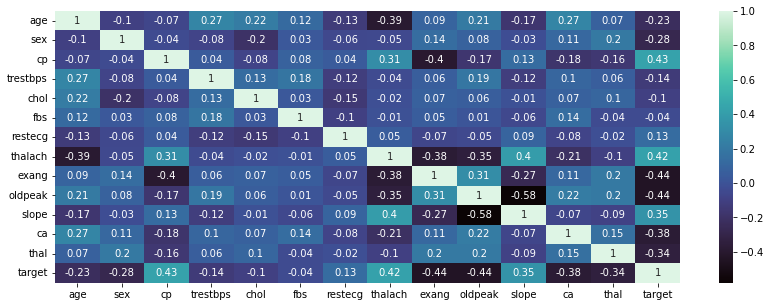

In [11]:
plt.figure(figsize = (14,5))
sns.heatmap(round(DF_corr,2),annot=True,cmap = 'mako')

In [12]:
# Fixing the Data Types
Mis_features=['thal','ca','slope','exang','restecg','fbs','cp','sex']
DF[Mis_features] = DF[Mis_features].astype(object)

In [13]:
DF.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [14]:
#Split numerical-categorical Features
numerical_col = DF.select_dtypes(exclude=np.object_)
categorical_col = DF.select_dtypes(exclude=np.number)

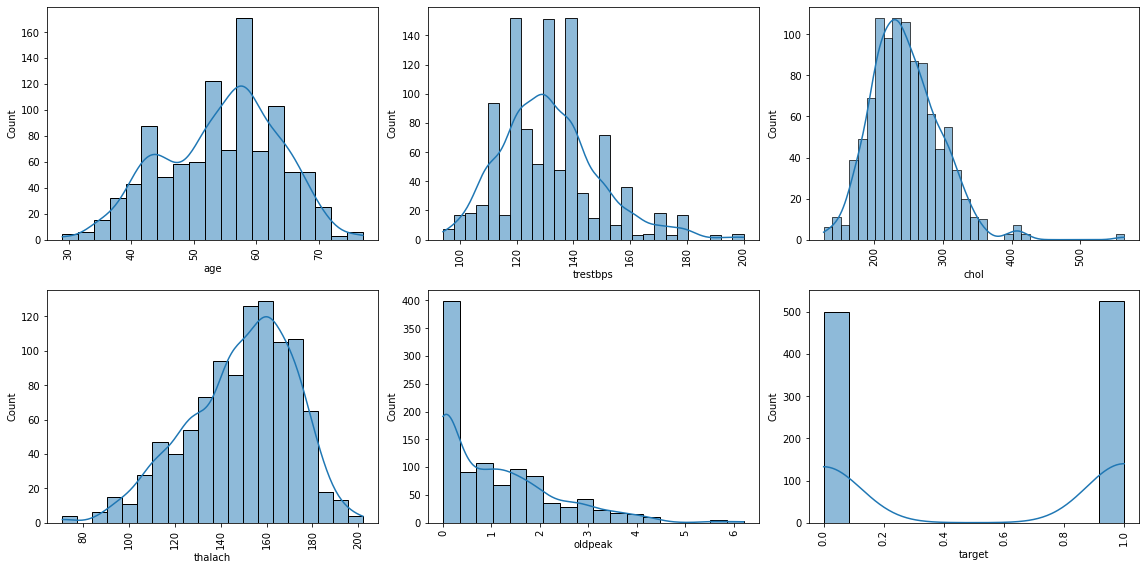

In [15]:
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

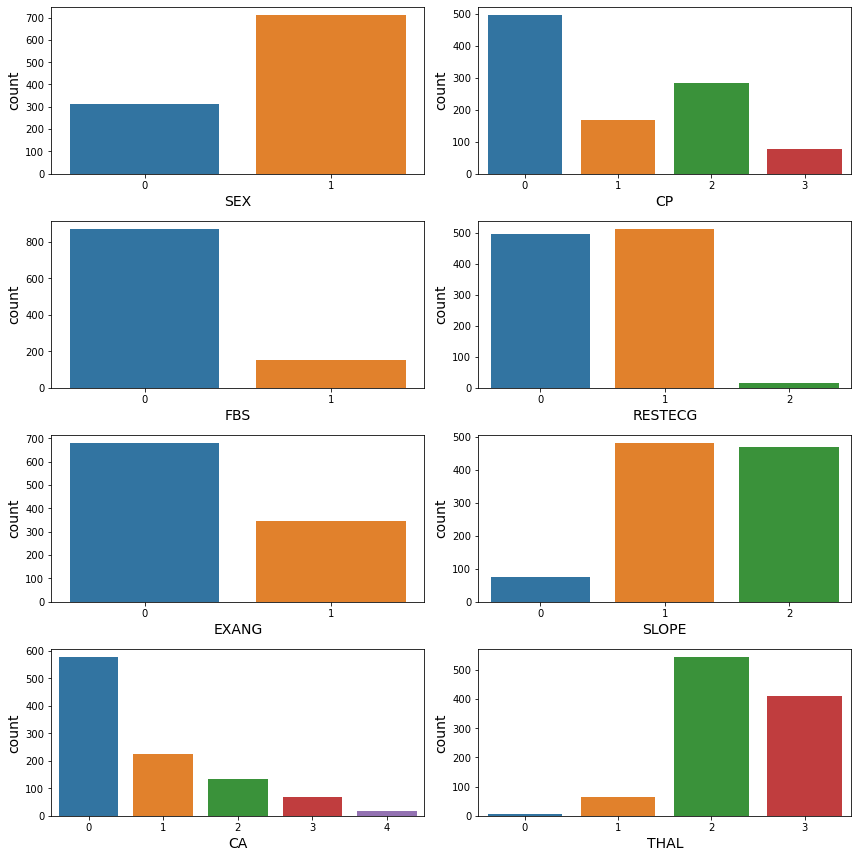

In [16]:
plt.figure(figsize=(12,12))
for index,column in enumerate(categorical_col):
    plt.subplot(4,2,index+1)
    sns.countplot(data=categorical_col,x=column)
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()

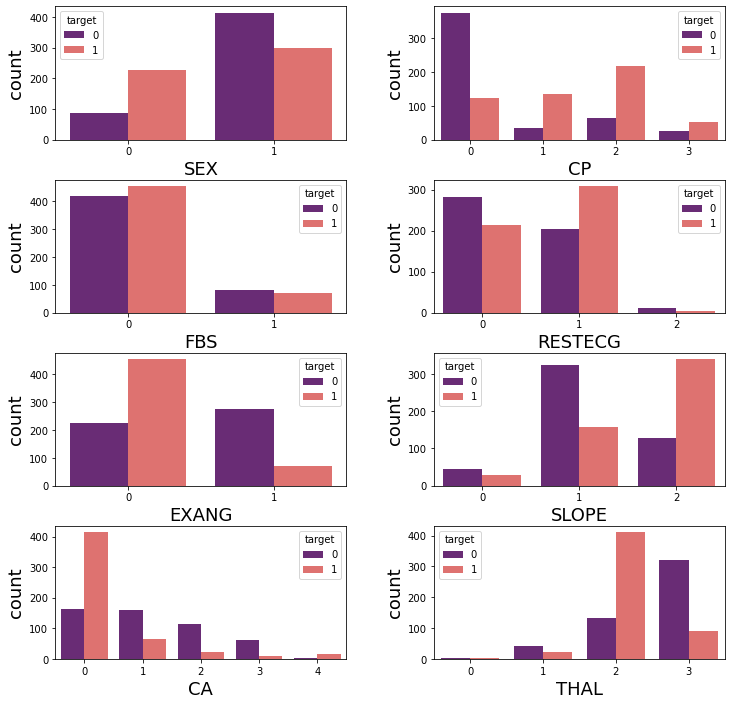

In [17]:
Cat_col=categorical_col.columns
fig = plt.figure(figsize=(12,12))
for index in range(len(Cat_col)):
    if Cat_col[index] != 'target':
        plt.subplot(4,2,index + 1)
        sns.countplot(data = categorical_col,x=Cat_col[index],hue=DF['target'], palette ="magma")
        plt.xlabel(Cat_col[index].upper(),fontsize=18)
        plt.ylabel("count", fontsize=18)
        plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

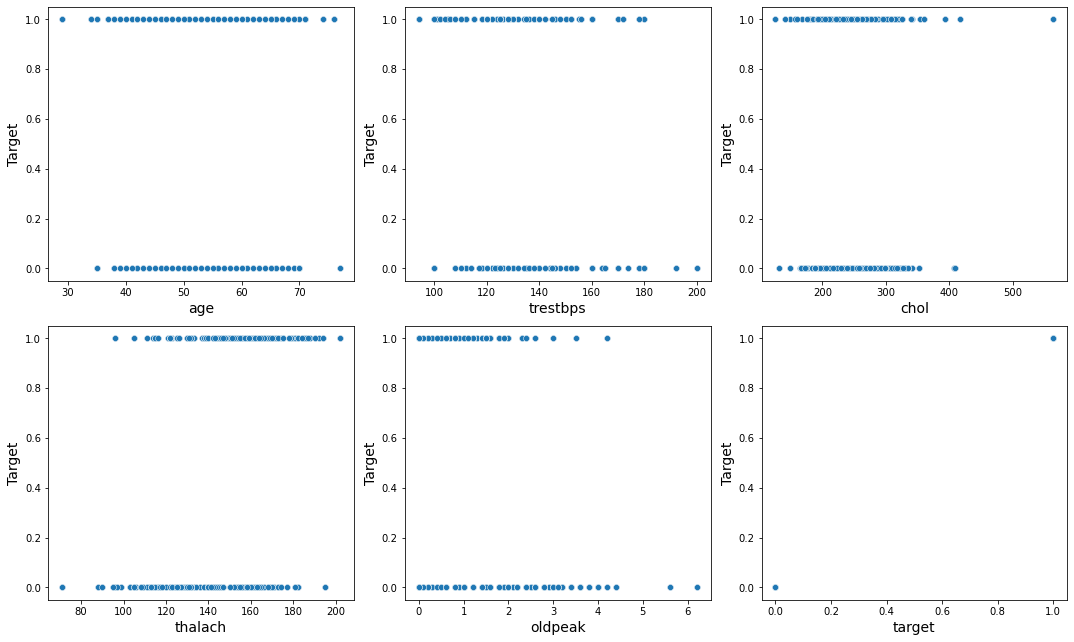

In [18]:
fig = plt.figure(figsize=(15,9))
for index in range(len(numerical_col.columns)):
    plt.subplot(2,3,index + 1)
    sns.scatterplot(x = numerical_col.iloc[:,index],y=DF.target,data = numerical_col)
    plt.xlabel( numerical_col.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

# Data Pre-Processing


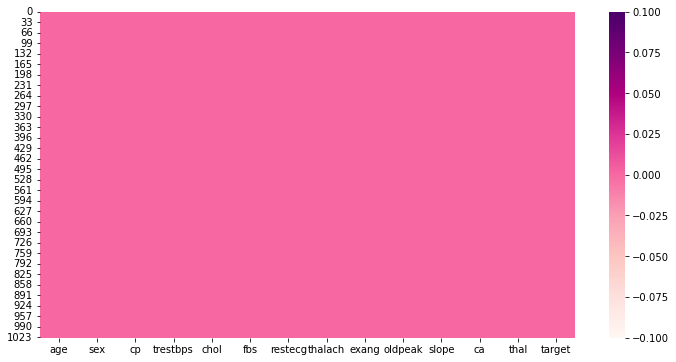

In [19]:
# Check for missing or duplicates Values
plt.figure(figsize=(12,6))
sns.heatmap(DF.isnull(),cmap='RdPu')
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

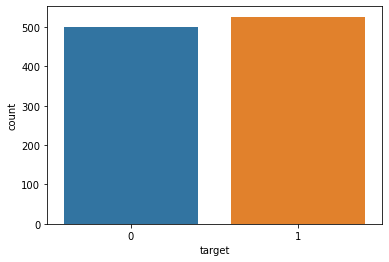

In [20]:
# Check for data imbalance
sns.countplot(data=DF,x='target')

# Encoding

In [21]:
Dum_DF=pd.get_dummies(DF,columns=['thal','ca','slope','exang','restecg','fbs','cp','sex'],drop_first=True)

In [22]:
Dum_DF.head()

,age,trestbps,chol,thalach,oldpeak,target,thal_1,thal_2,thal_3,ca_1,...,slope_1,slope_2,exang_1,restecg_1,restecg_2,fbs_1,cp_1,cp_2,cp_3,sex_1
0,52,125,212,168,1.0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,70,145,174,125,2.6,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0


# Split The Data

In [23]:
X = Dum_DF.drop(['target'], axis=1)
y = Dum_DF['target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

# Scale The Data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Modling

# ANN using sklearn

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV


hyper_parameters = {'batch_size':['auto',100], 'max_iter':[200,500],'hidden_layer_sizes':[5,(5,5,5)],
                    'learning_rate_init': [0.05,0.01,0.001,0.005]}


gs  =GridSearchCV(MLPClassifier(),hyper_parameters,scoring='roc_auc',n_jobs=-1
                  ,return_train_score=False,verbose=0,cv=5)
clf =gs.fit(x_train, y_train)
print('The best combination is:')
print(clf.best_params_)

print('The best Accuracy is:')
print(clf.best_score_)

The best combination is:
{'batch_size': 100, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate_init': 0.01, 'max_iter': 500}
The best Accuracy is:
0.9856173212956069


In [30]:
Final_Model=clf.best_estimator_
y_predicted =Final_Model.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

,Y_test,Y_predicted
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0
590,1,1
905,0,0
737,0,0


# Sk-learn Model Evaluation

In [31]:
from sklearn.metrics import plot_confusion_matrix,classification_report

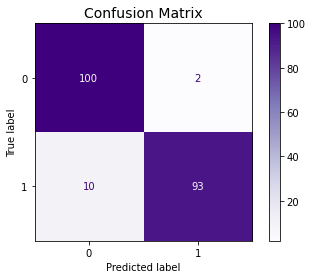

In [32]:
plot_confusion_matrix(Final_Model, x_test, y_test,cmap='Purples')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [33]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       102
           1       0.98      0.90      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score

In [35]:
print(f'\t\tMLP Model has A:- \n\nAccuracy: {accuracy_score(y_test,y_predicted).round(4)}\t\trecall_Score: {recall_score(y_test,y_predicted).round(4)}\nPrecision_score: {precision_score(y_test,y_predicted).round(4)}\t\tF1-score equals: {f1_score(y_test,y_predicted).round(4)}')

		MLP Model has A:- 

Accuracy: 0.9415		recall_Score: 0.9029
Precision_score: 0.9789		F1-score equals: 0.9394


# ANN Using Tensorflow

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_dim=22, activation= "relu"))#hidden layer with 300 neurons with relu activation15
model.add(keras.layers.Dense(75, activation = "relu")) #hidden layer with 100 neurons with relu activation
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1150      
                                                                 
 dense_1 (Dense)             (None, 75)                3825      
                                                                 
 dense_2 (Dense)             (None, 1)                 76        
                                                                 
Total params: 5051 (19.73 KB)
Trainable params: 5051 (19.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001)

In [40]:
model.compile(optimizer=optimizer,
             loss = "binary_crossentropy",
             metrics= ["accuracy"])

In [41]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=100,
          validation_data=(x_test, y_test), verbose=1
          )

Epoch 1/100
26/26 [==============================] - 7s 26ms/step - loss: 0.5387 - accuracy: 0.7695 - val_loss: 0.4776 - val_accuracy: 0.8000
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3742 - accuracy: 0.8500 - val_loss: 0.4265 - val_accuracy: 0.8049
Epoch 3/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.8659 - val_loss: 0.3950 - val_accuracy: 0.8146
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 0.2787 - accuracy: 0.8854 - val_loss: 0.3741 - val_accuracy: 0.8244
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.9049 - val_loss: 0.3572 - val_accuracy: 0.8293
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 0.2305 - accuracy: 0.9171 - val_loss: 0.3269 - val_accuracy: 0.8390
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 0.2132 - accuracy: 0.9293 - val_loss: 0.3238 - val_accuracy: 0.8537
Epoch 8/100


Epoch 59/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0564 - val_accuracy: 0.9854
Epoch 60/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9854
Epoch 61/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9854
Epoch 62/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 0.9854
Epoch 63/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9854
Epoch 64/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0547 - val_accuracy: 0.9854
Epoch 65/100
26/26 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9854
Epoch 

In [42]:
model_loss=pd.DataFrame(model.history.history)

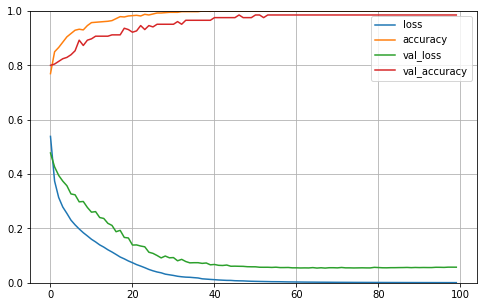

In [43]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Keras Model Evaluation

In [44]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9854


[0.0574227012693882, 0.9853658676147461]

In [46]:
y_predicted_tf =model.predict(x_test).reshape(-1)
y_predicted_tf = [1 if y>=0.5 else 0 for y in y_predicted_tf] 
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted_tf})
df.head(8)

7/7 [==============================] - 0s 0s/step


,Y_test,Y_predicted
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0
590,1,1
905,0,0
737,0,0


In [47]:
print(classification_report(y_predicted_tf,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [52]:
import joblib

In [53]:
joblib.dump(model,'model_joblib_heart')

['model_joblib_heart']

In [54]:
model = joblib.load('model_joblib_heart')

In [55]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\HP\AppData\Local\Temp/ipykernel_15492/2784296151.py", line 18, in show_entry_fields
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
  File "C:\Users\HP\Anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\HP\AppData\Local\Temp\__autograph_generated_file3nog_nn0.py", line 15, in tf__predict_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\HP\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 